In [ ]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:     
  scaler = StandardScaler()     
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [ ]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state = 42)
ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') 

0    50.0
1    50.0
Name: income, dtype: object

#Splitting the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)


In [ ]:
print("X_train shape:", x_train.shape) 
print("X_test shape:", x_test.shape) 
print("Y_train shape:", y_train.shape) 
print("Y_test shape:", y_test.shape)

X_train shape: (26048, 8)
X_test shape: (6513, 8)
Y_train shape: (26048,)
Y_test shape: (6513,)


##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state = 42)
ran_for.fit(x_train, y_train)
Y_pred_ran_for = ran_for.predict(x_test)



In [ ]:
from sklearn.metrics import accuracy_score
print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, Y_pred_ran_for) * 100, 2))


Random Forest Classifier:
Accuracy score: 84.48


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(x_train, y_train)
rf_cv.best_score_

0.8450938413472328

In [ ]:
rf_cv.best_params_


{'max_depth': 40, 'n_estimators': 110}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4908
           1       0.71      0.62      0.66      1605

    accuracy                           0.84      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt



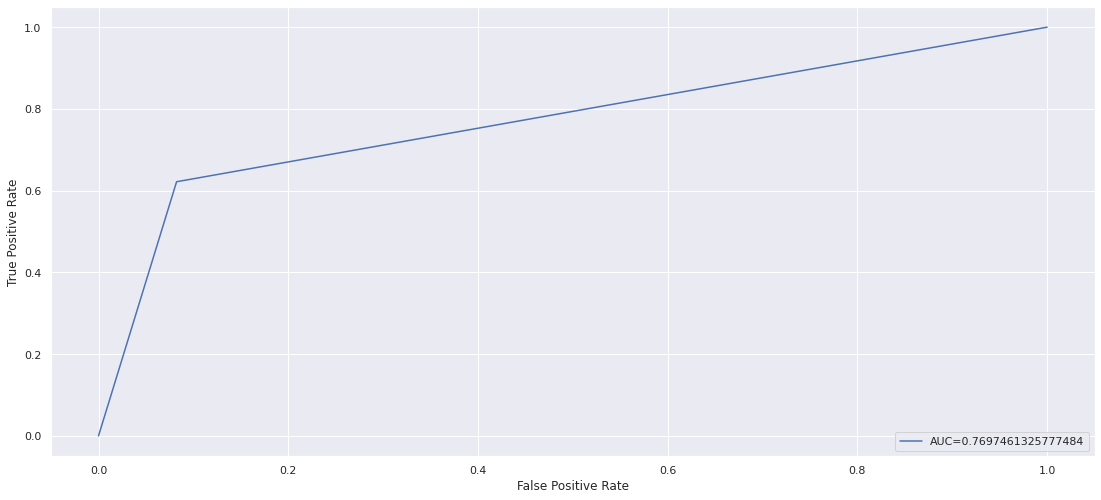

In [ ]:
#define metrics

fpr, tpr, _ = metrics.roc_curve(y_test, Y_pred_ran_for)
auc = metrics.roc_auc_score(y_test, Y_pred_ran_for)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()